#A Neural Network for handwritten digit recognition using the **MNIST** dataset 



##Imports

In [15]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader 
from torch import nn
from tqdm.auto import tqdm

##Downloading the data

In [16]:
training_set = datasets.MNIST(
    root='data', 
    train=True, 
    download=True, 
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_set = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [17]:
print(f'Number of images in the training set: {len(training_set)}')
print(f'Number of images in the test set: {len(test_set)}')

Number of images in the training set: 60000
Number of images in the test set: 10000


In [18]:
for i in range(0,60000,59999): #labels of first and last sample in training set
 img, label = training_set[i]
 print(label)

5
8


In [19]:
i = torch.randint(0, len(training_set), size=[1]).item()
img, label = training_set[i]
print(f'Shape of image {i} is: {img.shape}, image label: {label}')

Shape of image 11189 is: torch.Size([1, 28, 28]), image label: 6


In [20]:
# Classes included in the MNIST dataset
classes = training_set.classes 
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [21]:
training_set.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

##Data visualization

Image 28036 shape: torch.Size([1, 28, 28])


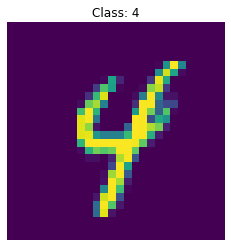

In [22]:
# Visualizing a random image of the training set
randint = torch.randint(0, len(training_set), size=[1]).item()
img, label = training_set[randint]
plt.imshow(img.squeeze())
plt.title(f'Class: {label}')
plt.axis(False);
print(f'Image {randint} shape: {img.shape}')

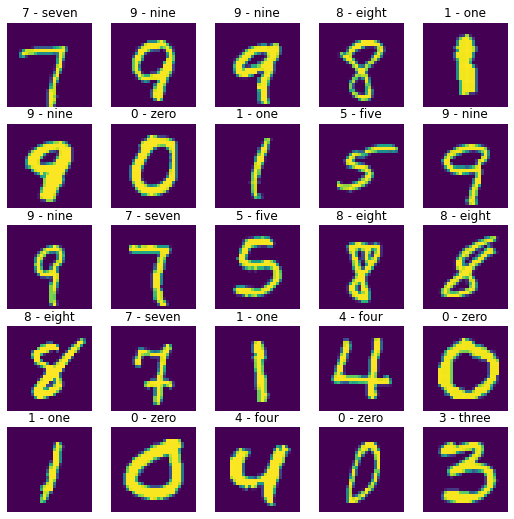

In [23]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 5, 5
for i in range(1, rows*cols+1):
  randidx = torch.randint(0, len(training_set),  size=[1]).item()
  img, label = training_set[randidx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze())
  plt.title(classes[label])
  plt.axis(False);

##Turning data into batches

In [24]:
batch_size = 25 

trainDL = DataLoader(dataset=training_set,
                              batch_size=batch_size,
                              shuffle=True)
testDL = DataLoader(dataset=test_set,
                             batch_size=batch_size,
                             shuffle=False)
print(f'DataLoaders: {trainDL, testDL}')
print(f'Now we have: \n {len(trainDL)} batches of {batch_size} samples for training \n {len(testDL)} batches of {batch_size} samples for testing ')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f8db01fe550>, <torch.utils.data.dataloader.DataLoader object at 0x7f8db01fe590>)
Now we have: 
 2400 batches of 25 samples for training 
 400 batches of 25 samples for testing 


In [25]:
train_x_batch, train_y_batch = next(iter(trainDL))
print(f'Shapes of training data: \n {train_x_batch.shape} -> features \n {train_y_batch.shape} -> labels')

Shapes of training data: 
 torch.Size([25, 1, 28, 28]) -> features 
 torch.Size([25]) -> labels


Same image coloured vs black and white


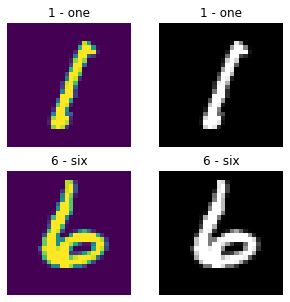

In [26]:
fig = plt.figure(figsize=(5, 5))
rows, cols = 2, 2
for i in range(1, rows*cols+1):
  fig.add_subplot(rows, cols, i)
  if i % 2 == 1:
    randnum = torch.randint(0, len(train_x_batch), size=[1]).item()
    img, label = train_x_batch[randnum], train_y_batch[randnum]
    plt.imshow(img.squeeze())
    plt.title(classes[label])
  else:
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(classes[label])
  plt.axis(False)
print('Same image coloured vs black and white')

## Model

In [30]:
from torch import nn
class MNISTmodel(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)          
    )
  def forward(self, x):
    return self.layer_stack(x)

In [31]:
torch.manual_seed(22)
model = MNISTmodel(
    input_shape=28*28,
    hidden_units=50, 
    output_shape=len(classes) 
)

model

MNISTmodel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=50, bias=True)
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
)

In [32]:
model.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0096,  0.0145, -0.0135,  ..., -0.0334,  0.0249,  0.0074],
                      [ 0.0117,  0.0152,  0.0125,  ..., -0.0011, -0.0145,  0.0271],
                      [-0.0101,  0.0101, -0.0341,  ..., -0.0082,  0.0193, -0.0228],
                      ...,
                      [ 0.0181, -0.0228,  0.0056,  ...,  0.0134, -0.0096,  0.0131],
                      [ 0.0046, -0.0285, -0.0213,  ...,  0.0217, -0.0113,  0.0182],
                      [-0.0064, -0.0250, -0.0286,  ..., -0.0268,  0.0180, -0.0136]])),
             ('layer_stack.1.bias',
              tensor([ 0.0011,  0.0337, -0.0150, -0.0231, -0.0054, -0.0225,  0.0051, -0.0117,
                      -0.0193, -0.0338, -0.0168,  0.0111,  0.0187,  0.0348,  0.0209,  0.0255,
                      -0.0076, -0.0016, -0.0203,  0.0008,  0.0150,  0.0047, -0.0064, -0.0079,
                      -0.0332, -0.0318,  0.0157, -0.0025,  0.0025, -0.0082,  0.0269,  0.0172,
                

In [33]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)  

In [34]:
torch.manual_seed(42)

epochs = 10 

for epoch in tqdm(range(epochs)):

  train_loss = 0
  
  for batch, (X, y) in enumerate(trainDL):
    model.train()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  train_loss /= len(trainDL)
  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X_test, y_test in testDL:     
      test_pred = model(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(testDL)
    test_acc /= len(testDL)

  print(f'Epoch {epoch}: \nTrain loss -> {train_loss:.4f} | Test loss -> {test_loss:.4f} | Test accuracy -> {test_acc:.4f}\n------')



  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0: 
Train loss -> 0.3858 | Test loss -> 0.2929 | Test accuracy -> 91.7100
------
Epoch 1: 
Train loss -> 0.3108 | Test loss -> 0.2893 | Test accuracy -> 91.9400
------
Epoch 2: 
Train loss -> 0.2993 | Test loss -> 0.2917 | Test accuracy -> 91.8000
------
Epoch 3: 
Train loss -> 0.2949 | Test loss -> 0.2883 | Test accuracy -> 91.7300
------
Epoch 4: 
Train loss -> 0.2899 | Test loss -> 0.2830 | Test accuracy -> 92.0800
------
Epoch 5: 
Train loss -> 0.2869 | Test loss -> 0.2926 | Test accuracy -> 91.6500
------
Epoch 6: 
Train loss -> 0.2826 | Test loss -> 0.2970 | Test accuracy -> 92.0000
------
Epoch 7: 
Train loss -> 0.2818 | Test loss -> 0.2950 | Test accuracy -> 91.5200
------
Epoch 8: 
Train loss -> 0.2787 | Test loss -> 0.2922 | Test accuracy -> 91.7800
------
Epoch 9: 
Train loss -> 0.2781 | Test loss -> 0.2931 | Test accuracy -> 92.0700
------


##Results 

In [35]:
torch.manual_seed(42)
def evaluation(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model name': model.__class__.__name__,
          'model loss': loss.item(),
          'model accuracy': acc}
print(f'Model performance on the test dataset')
model_results = evaluation(model=model,
                             data_loader=testDL,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_results

Model performance on the test dataset


{'model name': 'MNISTmodel',
 'model loss': 0.2930912673473358,
 'model accuracy': 92.07}